In [137]:
import matplotlib.pyplot as plt
import cv2

import skimage
from skimage import data, io
from skimage.exposure import rescale_intensity

import numpy as np


def read_image(path):
    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # image = np.where(image==255, 0, image)
    return image
    

bubbly_image = read_image("/home/leandro/git/amygda/examples/10-YA00100048-YA00100048-1/debug_images/well_0_4_cropped.chosen_hull.cropped.png")
growth_image = read_image("/home/leandro/git/amygda/examples/sample-images/06/debug_images/well_7_11_cropped.chosen_hull.cropped.png")
very_dispersed_growth_image = read_image("/home/leandro/git/amygda/examples/10-YA00038949-YA00038949-1/debug_images/well_1_3_cropped.chosen_hull.cropped.png")


In [27]:
import numpy as np
from skimage.morphology import reconstruction

seed = np.copy(image)
seed[1:-1, 1:-1] = image.max()
mask = image

filled = reconstruction(seed, mask, method='erosion')

seed = np.copy(image)
seed[1:-1, 1:-1] = image.min()
rec = reconstruction(seed, mask, method='dilation')

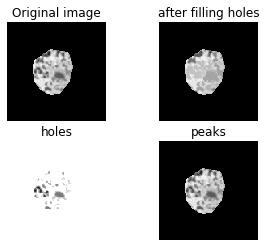

In [28]:
fig, ax = plt.subplots(2, 2, figsize=(5, 4), sharex=True, sharey=True)
ax = ax.ravel()

ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original image')
ax[0].axis('off')

ax[1].imshow(filled, cmap='gray')
ax[1].set_title('after filling holes')
ax[1].axis('off')

ax[2].imshow(image-filled, cmap='gray')
ax[2].set_title('holes')
ax[2].axis('off')

ax[3].imshow(image-rec, cmap='gray')
ax[3].set_title('peaks')
ax[3].axis('off')
plt.show()

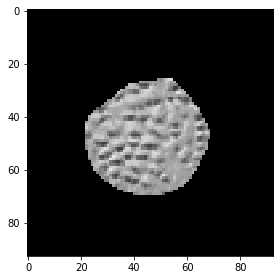

In [78]:
io.imshow(bubbly_image)

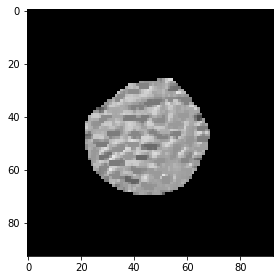

In [91]:
area_closing_bubbly_image = skimage.morphology.area_closing(bubbly_image, area_threshold=8)
io.imshow(area_closing_bubbly_image)

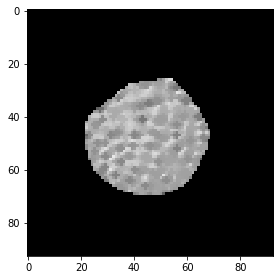

In [104]:
closing_bubbly_image = skimage.morphology.closing(bubbly_image)
io.imshow(closing_bubbly_image)

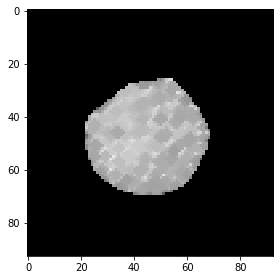

In [108]:
ball_area = skimage.morphology.ball(2)
closing_bubbly_image = skimage.morphology.closing(bubbly_image, ball_area[2])
io.imshow(closing_bubbly_image)

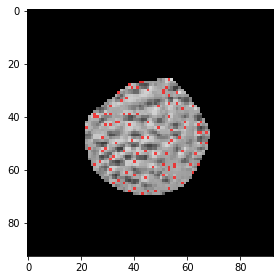

In [98]:
def show_local_maxima(image):
    local_maxima = skimage.morphology.extrema.local_maxima(image)
    label_maxima = skimage.measure.label(local_maxima)
    overlay = skimage.color.label2rgb(label_maxima, image, alpha=0.7, bg_label=0,
                              bg_color=None, colors=[(1, 0, 0)])
    io.imshow(overlay)
    
show_local_maxima(bubbly_image)

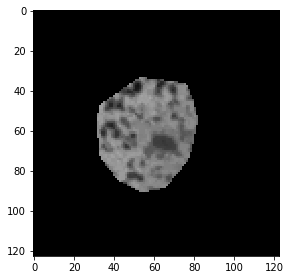

In [81]:
io.imshow(growth_image)

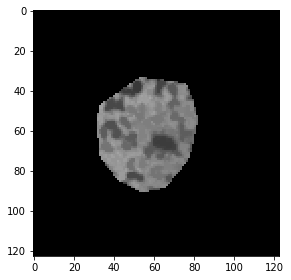

In [82]:
area_closing_growth_image = skimage.morphology.area_closing(growth_image, area_threshold=16)
io.imshow(area_closing_growth_image)

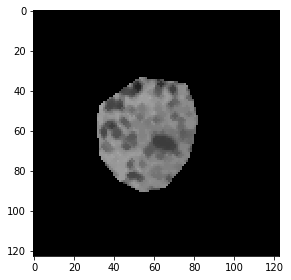

In [83]:
closing_growth_image = skimage.morphology.closing(growth_image)
io.imshow(closing_growth_image)

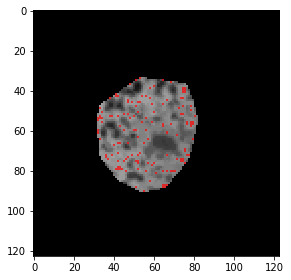

In [99]:
show_local_maxima(growth_image)

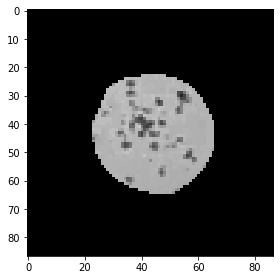

In [86]:
io.imshow(very_dispersed_growth_image)

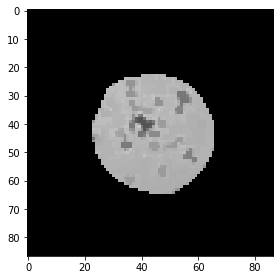

In [92]:
area_closing_very_dispersed_growth_image = skimage.morphology.area_closing(very_dispersed_growth_image, area_threshold=8)
io.imshow(area_closing_very_dispersed_growth_image)

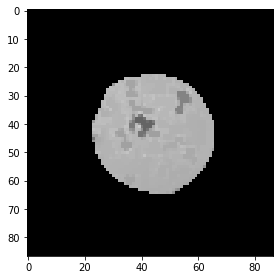

In [88]:
closing_very_dispersed_growth_image = skimage.morphology.closing(very_dispersed_growth_image)
io.imshow(area_closing_very_dispersed_growth_image)

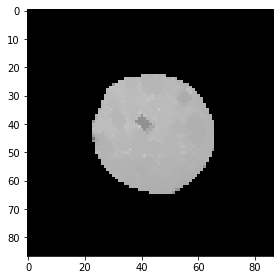

In [109]:
ball_area = skimage.morphology.ball(2)
closing_bubbly_image = skimage.morphology.closing(very_dispersed_growth_image, ball_area[2])
io.imshow(closing_bubbly_image)

In [123]:
x = 7
y = 11
unfiltered_image = cv2.imread(f"/home/leandro/git/amygda/examples/10-YA00100048-YA00100048-1//debug_images/well_{x}_{y}_cropped.chosen_hull.cropped.png")
unfiltered_image = cv2.cvtColor(unfiltered_image, cv2.COLOR_BGR2GRAY)
filtered_image = cv2.imread(f"/home/leandro/git/amygda/examples/10-YA00100048-YA00100048-1//debug_images/well_{x}_{y}_cropped.chosen_hull.cropped.bubbles_removed.png")
filtered_image = cv2.cvtColor(filtered_image, cv2.COLOR_BGR2GRAY)
_, unfiltered_image_binary_fixed = cv2.threshold(unfiltered_image, 120, 255, cv2.THRESH_BINARY)
_, filtered_image_binary_fixed = cv2.threshold(filtered_image, 120, 255, cv2.THRESH_BINARY)


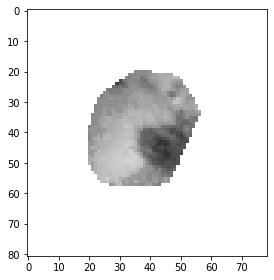

In [124]:
io.imshow(unfiltered_image)

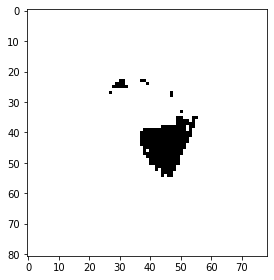

In [125]:
io.imshow(unfiltered_image_binary_fixed)

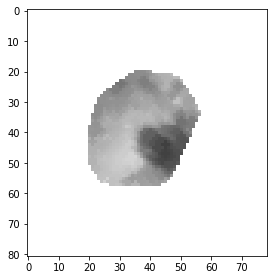

In [126]:
io.imshow(filtered_image)

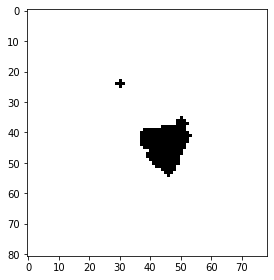

In [127]:
io.imshow(filtered_image_binary_fixed)

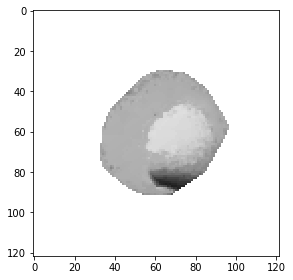

In [163]:
image_with_condensation = cv2.imread("/home/leandro/git/amygda/examples/sample-images/05/debug_images/well_0_3_cropped.chosen_hull.cropped.png")
image_with_condensation = cv2.cvtColor(image_with_condensation, cv2.COLOR_BGR2GRAY)
io.imshow(image_with_condensation)

None

NO CONDENSATION


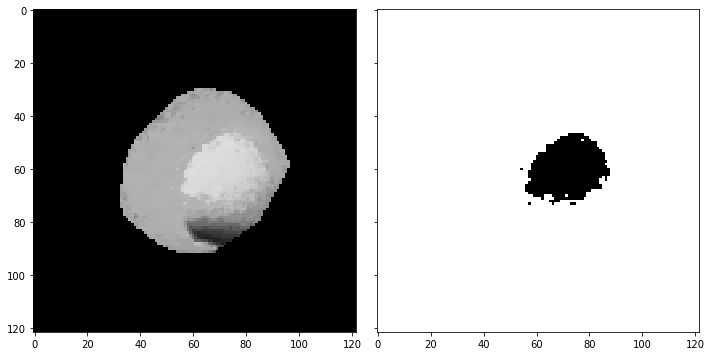

In [213]:
def get_nb_black_pixels_in_image(image):
    return np.count_nonzero(image == 0)

def read_image(path):
    image = cv2.imread(path)
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

def infer_condensation(path):
    image_with_condensation = read_image(path)

    image_with_condensation = np.where(image_with_condensation==255, 0, image_with_condensation)
    _, image_with_condensation_binary = cv2.threshold(image_with_condensation, 190, 255, cv2.THRESH_BINARY)

    pixels_on_the_condensation = cv2.bitwise_and(image_with_condensation, image_with_condensation_binary)
    pixels_on_the_condensation = np.where(pixels_on_the_condensation==0, 255, pixels_on_the_condensation)
    pixels_on_the_condensation = np.where(pixels_on_the_condensation<255, 0, pixels_on_the_condensation)
    
    circles=cv2.HoughCircles(pixels_on_the_condensation,cv2.HOUGH_GRADIENT,1,20,param1=10,param2=50,minRadius=1,maxRadius=200)
    display(circles)

    nb_black_pixels_in_image = get_nb_black_pixels_in_image(pixels_on_the_condensation)

    if nb_black_pixels_in_image == 0:
        print("CONDENSATION")
    else:
        print("NO CONDENSATION")
        
    fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, figsize=(10, 10))
    ax = axes.ravel()
    ax[0].imshow(cv2.cvtColor(image_with_condensation, cv2.COLOR_GRAY2BGR))
    ax[1].imshow(cv2.cvtColor(pixels_on_the_condensation, cv2.COLOR_GRAY2BGR))
    fig.tight_layout()
    plt.show()
    
infer_condensation("/home/leandro/git/amygda/examples/sample-images/05/debug_images/well_0_3_cropped.chosen_hull.cropped.png")

0.7108151260081691
0.7853981633974483


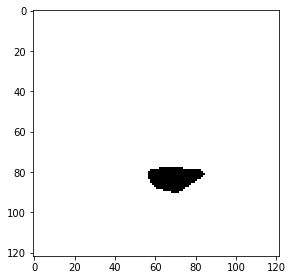

In [305]:
image = read_image("/home/leandro/git/amygda/examples/sample-images/05/debug_images/well_0_3_cropped.chosen_hull.cropped.png")
_, image_binarised = cv2.threshold(image, 120, 255, cv2.THRESH_BINARY)
contours, hierarchies = cv2.findContours(image_binarised, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
contours_areas = [cv2.contourArea(contour) for contour in contours]

medium_sized_contours = [contour for contour, area in zip(contours, contours_areas) if 20 <= area <= 15*15]

hulls = [cv2.convexHull(contour, False) for contour in medium_sized_contours]


image_with_hulls  = image.copy()
image_with_hulls[:] = 255
for hull in [hulls]:
    cv2.drawContours(image_with_hulls, hull, -1, 0, -1)
    ((x, y), (w, h), angle) = cv2.minAreaRect(hull[0])
    area_of_hull = cv2.contourArea(hull[0])
    area_of_rectangle = w*h
    print(area_of_hull / area_of_rectangle)
    print(math.pi / 4)
    

# (x,y), r = cv2.minEnclosingCircle(contours[0])
# cv2.circle(image_with_contours, (int(x), int(y)), int(r), 0, thickness=2)
io.imshow(image_with_hulls)

# import math
# condensation_probability = cv2.contourArea(hulls[0]) / (math.pi * r**2 / 2)
# if condensation_probability >= 1.0: condensation_probability = 0
# condensation_probability

None

NO CONDENSATION


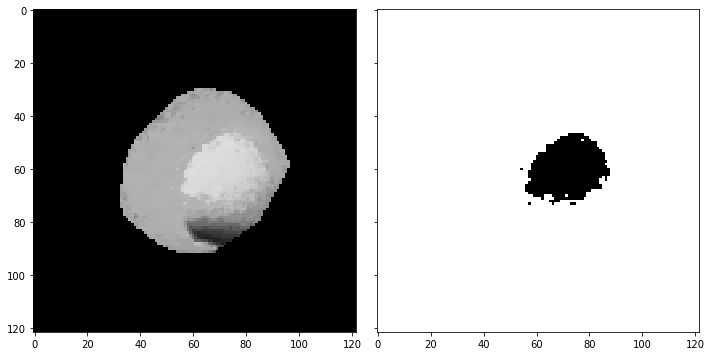

In [210]:


infer_condensation("/home/leandro/git/amygda/examples/sample-images/05/debug_images/well_0_3_cropped.chosen_hull.cropped.png")

CONDENSATION


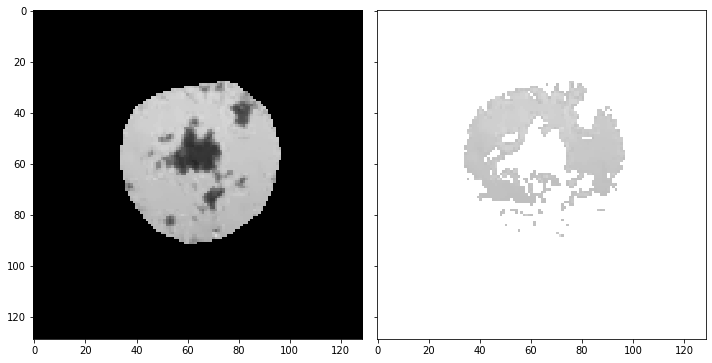

In [202]:
infer_condensation("/home/leandro/git/amygda/examples/sample-images/06/debug_images/well_0_5_cropped.chosen_hull.cropped.png")

CONDENSATION


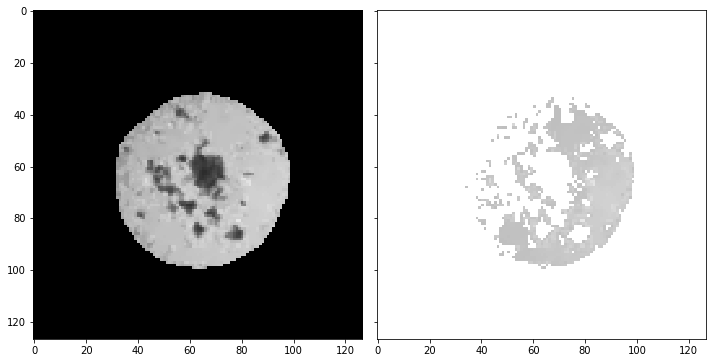

In [203]:
infer_condensation("/home/leandro/git/amygda/examples/sample-images/06/debug_images/well_3_7_cropped.chosen_hull.cropped.png")

CONDENSATION


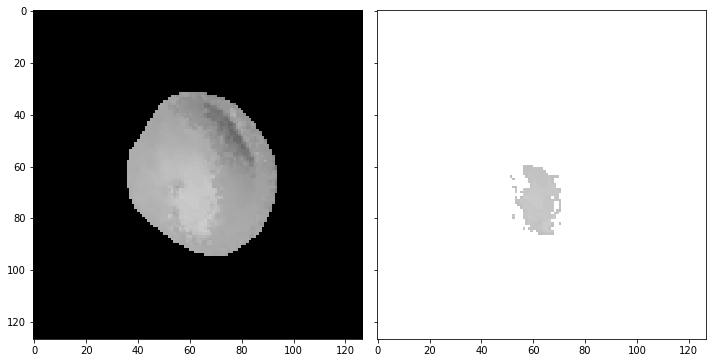

In [204]:
infer_condensation("/home/leandro/git/amygda/examples/sample-images/05/debug_images/well_5_1_cropped.chosen_hull.cropped.png")

CONDENSATION


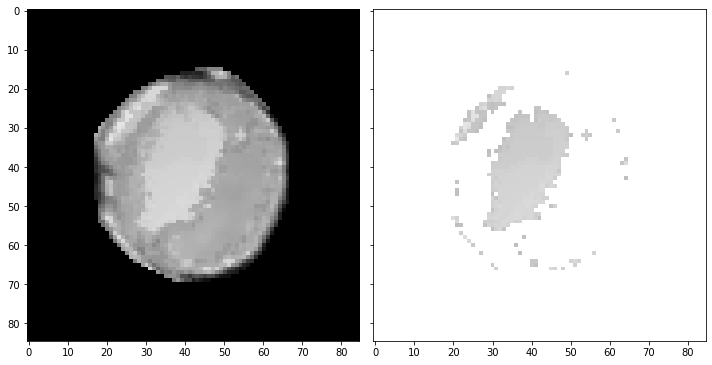

In [205]:
infer_condensation("/home/leandro/git/amygda/examples/10-YA00100048-YA00100048-1/debug_images/well_6_11_cropped.chosen_hull.cropped.png")

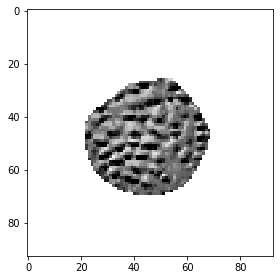

In [152]:
bubbly_image_sharpened = unsharp_mask(bubbly_image, radius=20, amount=1)
io.imshow(bubbly_image_sharpened)

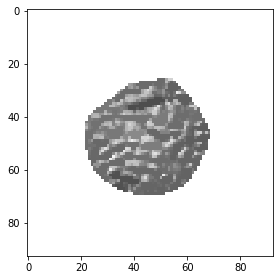

In [157]:
area_closing_bubbly_image_sharpened = skimage.morphology.area_closing(bubbly_image_sharpened, area_threshold=32)
io.imshow(area_closing_bubbly_image_sharpened)

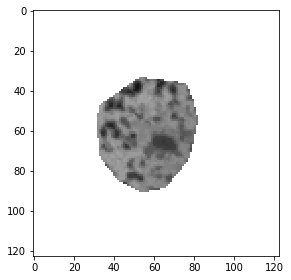

In [140]:
io.imshow(growth_image)

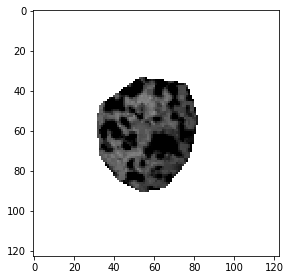

In [141]:
result_1 = unsharp_mask(growth_image, radius=20, amount=1)
io.imshow(result_1)

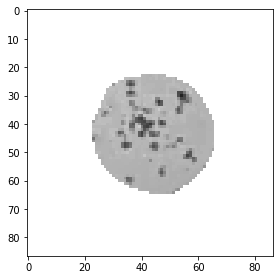

In [142]:
io.imshow(very_dispersed_growth_image)

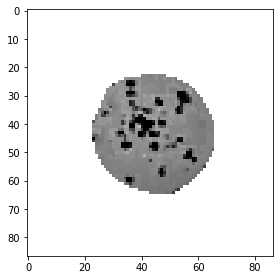

In [158]:
very_dispersed_growth_image_sharpened = unsharp_mask(very_dispersed_growth_image, radius=20, amount=1)
io.imshow(very_dispersed_growth_image_sharpened)

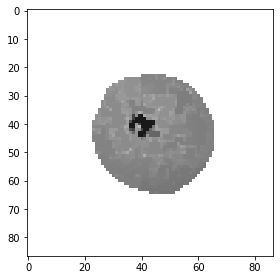

In [159]:
area_closing_very_dispersed_growth_image_sharpened = skimage.morphology.area_closing(very_dispersed_growth_image_sharpened, area_threshold=32)
io.imshow(area_closing_very_dispersed_growth_image_sharpened)